In [1]:
# Importing the libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os

In [2]:
# Preparing training and test data set 

size_of_img = 128

train_IDG = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_IDG = ImageDataGenerator(rescale=1./255)

training_images = train_IDG.flow_from_directory('Data/train',
                                                 target_size=(size_of_img, size_of_img),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_images = test_IDG.flow_from_directory('Data/test',
                                            target_size=(size_of_img , size_of_img),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 12845 images belonging to 27 classes.
Found 4268 images belonging to 27 classes.


In [3]:
# Building the CNN architecture

model = Sequential()

# First convolution layer and max pooling
model.add(Convolution2D(32, (3, 3), input_shape=(size_of_img, size_of_img, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and max pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# building ANN
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the final model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [4]:
# training the model on dataset generated

model.fit_generator(
        training_images,
        steps_per_epoch=1285,   # No of batches in training set
        epochs=5,
        validation_data=test_images,
        validation_steps=426)   # No of batches in test set

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_6560\178431452.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/5
1285/1285 [==============================] - 172s 132ms/step - loss: 2.0963 - accuracy: 0.3623 - val_loss: 0.3868 - val_accuracy: 0.8657
Epoch 2/5
1285/1285 [==============================] - 165s 129ms/step - loss: 0.6463 - accuracy: 0.7839 - val_loss: 0.0673 - val_accuracy: 0.9819
Epoch 3/5
1285/1285 [==============================] - 162s 126ms/step - loss: 0.3802 - accuracy: 0.8739 - val_loss: 0.0443 - val_accuracy: 0.9843
Epoch 4/5
1285/1285 [==============================] - 175s 136ms/step - loss: 0.2786 - accuracy: 0.9098 - val_loss: 0.0293 - val_accuracy: 0.9911
Epoch 5/5
1285/1285 [==============================] - 165s 128ms/step - loss: 0.2243 - accuracy: 0.9320 - val_loss: 0.0153 - val_accuracy: 0.9960


In [5]:
# saving the model and the weights

model_json = model.to_json()
with open("model-bw10.json", "w") as saved_model:
    saved_model.write(model_json)
print('Model Saved Succesfully')
model.save_weights('model-bw10.h5')
print('Weights Saved Succesfully')

Model Saved Succesfully
Weights Saved Succesfully


In [6]:
# Loading the model architecture from the saved JSON file

with open("model-bw10.json", "r") as saved_model:
    tmp_model = saved_model.read()
final_model = model_from_json(tmp_model)

# Loading the saved model weights
final_model.load_weights("model-bw10.h5")

# Compiling the loaded model 
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
y_testa=[]
x_testa=[]
image_files = os.listdir('Data/test')
print("Image files found:", len(image_files))
j=0

for i in image_files:
    for img in os.listdir(os.path.join('Data/test',i)):
        # print(img)
        img_pt=os.path.join(os.path.join('Data/test',i),img)
        
        im=cv2.imread(img_pt,cv2.IMREAD_GRAYSCALE)
        im=cv2.resize(im,(size_of_img,size_of_img))
        im=im/255.0
        x_testa.append(im)
        y_testa.append(j)
    j+=1
# x_testa=np.array(x_testa)
x_testa=np.array(x_testa)
y_testa=np.array(y_testa)


predicteda = final_model.predict_generator(x_testa, steps=len(x_testa), verbose=1)
predicteda=predicteda.argmax(axis=1)
print(predicteda.shape)

Image files found: 27


C:\Users\PRIYA\AppData\Local\Temp\ipykernel_6560\4184292721.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicteda = final_model.predict_generator(x_testa, steps=len(x_testa), verbose=1)


4268/4268 [==============================] - 45s 11ms/step
(4268,)


In [8]:
lst = []
ct = 0 
for i in y_testa: 
    lst.append(i)

final_val = predicteda

for i in range(len(lst)):
    if(lst[i]!=final_val[i]) : ct += 1
    
print(ct)
print(len(lst))
print(predicteda)

14
4268
[ 0  0  0 ... 26 26 26]


In [9]:
predicted_labels = predicteda
true_labels = y_testa

cm = confusion_matrix(true_labels, predicted_labels)

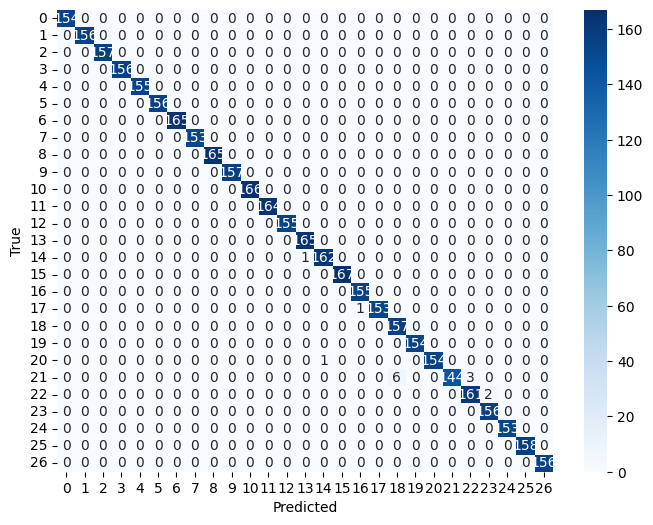

In [10]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
